# تجارب النموذج وضبط المعاملات

هذا الدفتر مخصص لتجريب نماذج مختلفة وضبط المعاملات

In [3]:
# استيراد المكتبات المطلوبة
import sys
sys.path.append('../src')

import numpy as np
import matplotlib.pyplot as plt
from data_processing import load_images
from model import create_cnn_model, create_simple_cnn_model, compile_model, print_model_summary
from train import train_model, evaluate_model

import warnings
warnings.filterwarnings('ignore')

## 1. تحميل البيانات

In [4]:
# تحميل البيانات
train_generator, test_generator, class_names = load_images(
    data_dir="../data/animals10",
    batch_size=32
)

print(f"عدد الفئات: {len(class_names)}")
print(f"أسماء الفئات: {class_names}")

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.
تم العثور على 20947 صورة تدريب
تم العثور على 5232 صورة اختبار
عدد الفئات: 10
أسماء الفئات: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
عدد الفئات: 10
أسماء الفئات: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


## 2. تجريب النموذج المبسط

In [5]:
# إنشاء النموذج المبسط
simple_model = create_simple_cnn_model(num_classes=len(class_names))
simple_model = compile_model(simple_model, learning_rate=0.001)

print("النموذج المبسط:")
print_model_summary(simple_model)

النموذج المبسط:
ملخص النموذج


Model: "simple_animal_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,930 (12.61 MB)

 Trainable params: 3,305,930 (12.61 MB)

 Non-trainable params: 0 (0.00 B)


إجمالي المعاملات: 3,305,930
المعاملات القابلة للتدريب: 3,305,930
المعاملات غير القابلة للتدريب: 0


In [6]:
# تدريب سريع للنموذج المبسط (5 عصور فقط للاختبار)
print("تدريب النموذج المبسط...")
simple_history = train_model(
    simple_model, 
    train_generator, 
    test_generator, 
    epochs=5
)

تدريب النموذج المبسط...
بدء تدريب النموذج...
عدد العصور: 5
عدد عينات التدريب: 20947
عدد عينات التحقق: 5232
--------------------------------------------------
Epoch 1/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 303s 461ms/step - accuracy: 0.2589 - loss: 2.0740 - top_k_categorical_accuracy: 0.5650 - val_accuracy: 0.3396 - val_loss: 1.8884 - val_top_k_categorical_accuracy: 0.6575
Epoch 2/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 129s 197ms/step - accuracy: 0.3659 - loss: 1.8187 - top_k_categorical_accuracy: 0.6794 - val_accuracy: 0.3888 - val_loss: 1.7320 - val_top_k_categorical_accuracy: 0.7141
Epoch 3/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 126s 192ms/step - accuracy: 0.4191 - loss: 1.6919 - top_k_categorical_accuracy: 0.7230 - val_accuracy: 0.4373 - val_loss: 1.6044 - val_top_k_categorical_accuracy: 0.7555
Epoch 4/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 125s 190ms/step - accuracy: 0.4643 - loss: 1.5701 - top_k_categorical_accuracy: 0.7571 - val_accuracy: 0.5279 - val_loss: 1.3369 - val_top_k_categorical_accuracy: 0.8295
Epoch 

## 3. تجريب النموذج المتقدم

In [7]:
# إنشاء النموذج المتقدم
advanced_model = create_cnn_model(num_classes=len(class_names))
advanced_model = compile_model(advanced_model, learning_rate=0.001)

print("النموذج المتقدم:")
print_model_summary(advanced_model)

النموذج المتقدم:
ملخص النموذج


Model: "animal_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,0

 Total params: 658,890 (2.51 MB)

 Trainable params: 656,394 (2.50 MB)

 Non-trainable params: 2,496 (9.75 KB)


إجمالي المعاملات: 658,890
المعاملات القابلة للتدريب: 656,394
المعاملات غير القابلة للتدريب: 2,496


In [8]:
# تدريب سريع للنموذج المتقدم (5 عصور فقط للاختبار)
print("تدريب النموذج المتقدم...")
advanced_history = train_model(
    advanced_model, 
    train_generator, 
    test_generator, 
    epochs=5
)

تدريب النموذج المتقدم...
بدء تدريب النموذج...
عدد العصور: 5
عدد عينات التدريب: 20947
عدد عينات التحقق: 5232
--------------------------------------------------
Epoch 1/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 281s 424ms/step - accuracy: 0.2414 - loss: 2.4287 - top_k_categorical_accuracy: 0.5175 - val_accuracy: 0.2324 - val_loss: 2.7631 - val_top_k_categorical_accuracy: 0.4482
Epoch 2/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 269s 411ms/step - accuracy: 0.3649 - loss: 1.8377 - top_k_categorical_accuracy: 0.6737 - val_accuracy: 0.3502 - val_loss: 1.9249 - val_top_k_categorical_accuracy: 0.6724
Epoch 3/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 276s 422ms/step - accuracy: 0.4522 - loss: 1.5814 - top_k_categorical_accuracy: 0.7568 - val_accuracy: 0.2976 - val_loss: 2.1300 - val_top_k_categorical_accuracy: 0.5636
Epoch 4/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 276s 421ms/step - accuracy: 0.5138 - loss: 1.4109 - top_k_categorical_accuracy: 0.8084 - val_accuracy: 0.4757 - val_loss: 1.6060 - val_top_k_categorical_accuracy: 0.7544
Epoch

## 4. مقارنة النماذج

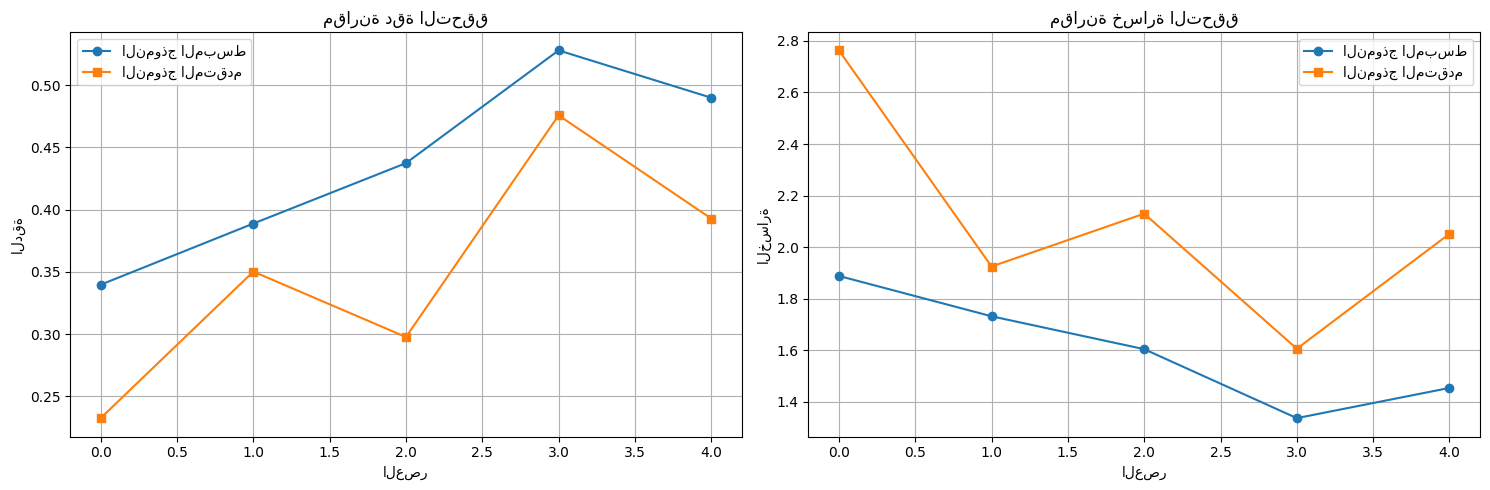

In [9]:
# مقارنة أداء النماذج
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# مقارنة الدقة
axes[0].plot(simple_history.history['val_accuracy'], label='النموذج المبسط', marker='o')
axes[0].plot(advanced_history.history['val_accuracy'], label='النموذج المتقدم', marker='s')
axes[0].set_title('مقارنة دقة التحقق')
axes[0].set_xlabel('العصر')
axes[0].set_ylabel('الدقة')
axes[0].legend()
axes[0].grid(True)

# مقارنة الخسارة
axes[1].plot(simple_history.history['val_loss'], label='النموذج المبسط', marker='o')
axes[1].plot(advanced_history.history['val_loss'], label='النموذج المتقدم', marker='s')
axes[1].set_title('مقارنة خسارة التحقق')
axes[1].set_xlabel('العصر')
axes[1].set_ylabel('الخسارة')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

## 5. تقييم النماذج

In [10]:
# تقييم النموذج المبسط
print("تقييم النموذج المبسط:")
simple_results = evaluate_model(simple_model, test_generator, class_names)

print("\n" + "="*50)

# تقييم النموذج المتقدم
print("تقييم النموذج المتقدم:")
advanced_results = evaluate_model(advanced_model, test_generator, class_names)

تقييم النموذج المبسط:
تقييم أداء النموذج...
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.4899 - loss: 1.4540 - top_k_categorical_accuracy: 0.7886
دقة الاختبار: 0.4899
دقة Top-3: 0.7886
خسارة الاختبار: 1.4540
164/164 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step

تقرير التصنيف:
              precision    recall  f1-score   support

        cane       0.74      0.30      0.43       972
     cavallo       0.40      0.68      0.50       524
    elefante       0.47      0.13      0.21       289
    farfalla       0.68      0.77      0.72       422
     gallina       0.38      0.86      0.52       619
       gatto       0.00      0.00      0.00       333
       mucca       0.49      0.23      0.31       373
      pecora       0.38      0.37      0.38       364
       ragno       0.59      0.73      0.66       964
  scoiattolo       0.39      0.24      0.30       372

    accuracy                           0.49      5232
   macro avg       0.45      0.43      0.40      5232
weighted avg       

## 6. الخلاصة والتوصيات

### النتائج:
- النموذج المبسط: سريع التدريب ولكن دقة أقل
- النموذج المتقدم: يحتاج وقت أطول ولكن دقة أعلى

### التوصيات:
1. استخدام النموذج المتقدم للحصول على أفضل النتائج
2. زيادة عدد العصور للحصول على تدريب أفضل
3. تجريب معدلات تعلم مختلفة
4. استخدام callbacks للتحكم في التدريب